# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thit16 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2016.csv')
thit17 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv')
thit18 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv')
thit19 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv')
thit20 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2020.csv')
thit = pd.concat([thit16, thit17, thit18, thit19]).reset_index(drop=True)
thit = thit.sort_values(['GDAY_DS', 'T_ID'])
thit['GDAY_DS'] = pd.to_datetime(thit['GDAY_DS'].astype('str'))

tpit16 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2016.csv')
tpit17 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2017.csv')
tpit18 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2018.csv')
tpit19 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2019.csv')
tpit20 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_팀투수_2020.csv')
tpit = pd.concat([tpit16, tpit17, tpit18, tpit19]).reset_index(drop=True)
tpit = tpit.sort_values(['GDAY_DS', 'T_ID'])
tpit['GDAY_DS'] = pd.to_datetime(tpit['GDAY_DS'].astype('str'))

phit16 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2016.csv')
phit17 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2017.csv')
phit18 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2018.csv')
phit19 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2019.csv')
phit20 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인타자_2020.csv')
phit = pd.concat([phit16, phit17, phit18, phit19]).reset_index(drop=True)
phit = phit.sort_values(['GDAY_DS', 'T_ID'])
phit['GDAY_DS'] = pd.to_datetime(phit['GDAY_DS'].astype('str'))

ppit16 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2016.csv')
ppit17 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2017.csv')
ppit18 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2018.csv')
ppit19 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2019.csv')
ppit20 = pd.read_csv('./Raw_data/2020빅콘테스트_스포츠투아이_제공데이터_개인투수_2020.csv')
ppit = pd.concat([ppit16, ppit17, ppit18, ppit19]).reset_index(drop=True)
ppit = ppit.sort_values(['GDAY_DS', 'T_ID'])
ppit['GDAY_DS'] = pd.to_datetime(ppit['GDAY_DS'].astype('str'))

chit20 = pd.read_csv('chit20.csv')
cpit20 = pd.read_csv('cpit20.csv')

chit20 = chit20.drop(chit20[chit20.PA==0].index).reset_index(drop=True)
cpit20 = cpit20.drop(cpit20[cpit20.WLS=='0'].index).reset_index(drop=True)

thit20 = pd.concat([thit20, chit20]).sort_values('G_ID').reset_index(drop=True)
tpit20 = pd.concat([tpit20, cpit20]).sort_values('G_ID').reset_index(drop=True)

In [3]:
num_play = {'SK': [0,0], 'HH':[0,0], 'KT':[0,0], 'LT':[0,0], 'SS':[0,0], 'NC':[0,0],
        'LG':[0,0], 'OB':[0,0], 'HT':[0,0], 'WO':[0,0]}

remain = pd.read_excel('./Raw_Data/2020 KBO 정규시즌 잔여경기 현황_공지(200918).xlsx', sheet_name='잔여경기', skiprows=2)

remain['AWAY'].replace(['KIA','삼성','두산','롯데','키움','한화'],
                       ['HT','SS','OB','LT','WO','HH'], inplace=True)
remain['HOME'].replace(['KIA','삼성','두산','롯데','키움','한화'],
                       ['HT','SS','OB','LT','WO','HH'], inplace=True)

remain2 = remain.copy()
remain2['AWAY'] = remain['HOME']
remain2['HOME'] = remain['AWAY']
remain = pd.concat([remain,remain2])

for team in thit20['T_ID'].unique():
    num_play[team][0] = thit20[thit20['T_ID']==team].shape[0] - 5
    num_play[team][1] = num_play[team][0] + remain[remain['HOME']==team].shape[0] - 1

In [4]:
def data_preprocessing(hit,pit):
    thit_yy = hit.copy(); tpit_yy = pit.copy()
    thit_yy = thit_yy.assign(HIT_CUM=None, AB_CUM=None, AVG=None)
    tpit_yy = tpit_yy.assign(ER_CUM=None, INN2_CUM=None, ERA=None, WLS_CUM=None, ROUND=None, W_RATE=None)
    thit_yy = thit_yy.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    tpit_yy = tpit_yy.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    WLS = {'W':1, 'L':0, 'D':0}
    f = lambda x: WLS.get(x, x)
    tpit_yy['WLS'] = tpit_yy['WLS'].map(f)
    for i in [144*n for n in range(10)]:
        thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('HIT_CUM')] = thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('HIT')].cumsum()
        thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AB_CUM')] = thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AB')].cumsum()
        thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AVG')] = thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('HIT_CUM')] / thit_yy.iloc[i:i+144, thit_yy.columns.get_loc('AB_CUM')]
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ER_CUM')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ER')].cumsum()
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('INN2_CUM')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('INN2')].cumsum()
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ERA')] = (9*tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ER_CUM')]) / (tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('INN2_CUM')]/3)
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('WLS_CUM')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('WLS')].cumsum()
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ROUND')] = range(1, 145)
        tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('W_RATE')] = tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('WLS_CUM')] / tpit_yy.iloc[i:i+144, tpit_yy.columns.get_loc('ROUND')]

    t_yy = pd.merge(thit_yy[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'AVG']],
              tpit_yy[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'ERA', 'W_RATE', 'WLS']]).sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    t_yy['VS_AVG'] = t_yy.sort_values(['VS_T_ID', 'GDAY_DS']).reset_index(drop=True)['AVG']
    t_yy['VS_ERA'] = t_yy.sort_values(['VS_T_ID', 'GDAY_DS']).reset_index(drop=True)['ERA']
    t_yy['VS_W_RATE'] = t_yy.sort_values(['VS_T_ID', 'GDAY_DS']).reset_index(drop=True)['W_RATE']
    t_yy['VS_WLS'] = t_yy.sort_values(['VS_T_ID', 'GDAY_DS']).reset_index(drop=True)['WLS']
    t_yy = t_yy.sort_values('G_ID').reset_index(drop=True)
    t_yy = t_yy.assign(AVG_1=None, ERA_1=None, VS_AVG_1=None, VS_ERA_1=None)
    t_yy = t_yy.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)

    for i in range(1439):
        t_yy.iloc[i+1, t_yy.columns.get_loc('AVG_1')] = t_yy.iloc[i, t_yy.columns.get_loc('AVG')]
        t_yy.iloc[i+1, t_yy.columns.get_loc('ERA_1')] = t_yy.iloc[i, t_yy.columns.get_loc('ERA')]

    t_yy = t_yy.sort_values(['VS_T_ID', 'GDAY_DS']).reset_index(drop=True)

    for i in range(1439):
        t_yy.iloc[i+1, t_yy.columns.get_loc('VS_AVG_1')] = t_yy.iloc[i, t_yy.columns.get_loc('VS_AVG')]
        t_yy.iloc[i+1, t_yy.columns.get_loc('VS_ERA_1')] = t_yy.iloc[i, t_yy.columns.get_loc('VS_ERA')]

    t_yy = t_yy.drop([144*n for n in range(10)]).sort_values(['G_ID']).reset_index(drop=True)
    return(t_yy)

In [5]:
t16 = data_preprocessing(thit16, tpit16)
t17 = data_preprocessing(thit17, tpit17)
t18 = data_preprocessing(thit18, tpit18)
t19 = data_preprocessing(thit19, tpit19)

# AVG

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**RandomForest**

In [7]:
def AVG(t, team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = XX.iloc[40:start, [XX.columns.get_loc('AVG_1')]].reset_index(drop=True)
    y_train = XX.iloc[40:start, XX.columns.get_loc('AVG')].reset_index(drop=True)
    X_test = pd.DataFrame([y_train.iloc[start-41]], columns=['AVG_1'])
    for i in range(start-40, end-40):
        rf = RandomForestRegressor(random_state=123)
        rf.fit(X_train, y_train)
        X_train = pd.concat([X_train, pd.DataFrame([y_train.iloc[i-1]], columns=['AVG_1'])]).reset_index(drop=True)
        y_train = pd.concat([y_train, pd.Series(rf.predict(X_test))]).reset_index(drop=True)
        X_test = pd.DataFrame([y_train.iloc[i]], columns=['AVG_1'])
    AVG_pred = pd.concat([y_train, pd.DataFrame(rf.predict(X_test))]).reset_index(drop=True)
    AVG_pred.columns = ['AVG(pred)']
    AVG_pred = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('AVG')].reset_index(drop=True), AVG_pred], axis=1)
    return AVG_pred

In [8]:
var_names = 'AVG_pred_' + t19['T_ID'].unique()
for var_name in var_names:
    team_name = var_name[9:11]
    globals()[var_name] = AVG(t19, team_name, num_play[team_name][0], num_play[team_name][1])

In [9]:
AVG_TOTAL = pd.concat([pd.DataFrame([AVG_pred_OB.iloc[num_play['OB'][0]-41, 1], AVG_pred_NC.iloc[num_play['NC'][0]-41, 1], AVG_pred_LG.iloc[num_play['LG'][0]-41, 1], AVG_pred_KT.iloc[num_play['KT'][0]-41, 1],
                                    AVG_pred_LT.iloc[num_play['LT'][0]-41, 1], AVG_pred_HT.iloc[num_play['HT'][0]-41, 1], AVG_pred_SS.iloc[num_play['SS'][0]-41, 1], AVG_pred_WO.iloc[num_play['WO'][0]-41, 1],
                                    AVG_pred_SK.iloc[num_play['SK'][0]-41, 1], AVG_pred_HH.iloc[num_play['HH'][0]-41, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG_pred(start)']),
                       pd.DataFrame([AVG_pred_OB.iloc[-1, 1], AVG_pred_NC.iloc[-1, 1], AVG_pred_LG.iloc[-1, 1], AVG_pred_KT.iloc[-1, 1],
                                    AVG_pred_LT.iloc[-1, 1], AVG_pred_HT.iloc[-1, 1], AVG_pred_SS.iloc[-1, 1], AVG_pred_WO.iloc[-1, 1],
                                    AVG_pred_SK.iloc[-1, 1], AVG_pred_HH.iloc[-1, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG_pred(end)']),
                       pd.DataFrame([AVG_pred_OB.iloc[-1, 0], AVG_pred_NC.iloc[-1, 0], AVG_pred_LG.iloc[-1, 0], AVG_pred_KT.iloc[-1, 0],
                                     AVG_pred_LT.iloc[-1, 0], AVG_pred_HT.iloc[-1, 0], AVG_pred_SS.iloc[-1, 0], AVG_pred_WO.iloc[-1, 0],
                                     AVG_pred_SK.iloc[-1, 0], AVG_pred_HH.iloc[-1, 0]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['AVG(end)'])], axis=1)
AVG_TOTAL

,AVG_pred(start),AVG_pred(end),AVG(end)
OB,0.273828,0.272946,0.276600
NC,0.277921,0.280635,0.277028
LG,0.268020,0.266718,0.269023
KT,0.277479,0.276964,0.276939
LT,0.257513,0.256078,0.252245
HT,0.267287,0.267345,0.264135
SS,0.259164,0.257901,0.257390
WO,0.282483,0.281778,0.283302
SK,0.265633,0.265329,0.262477
HH,0.255676,0.255906,0.255853


In [10]:
np.sqrt(mse(AVG_TOTAL['AVG_pred(end)'], AVG_TOTAL['AVG(end)']))

0.002595944971585654

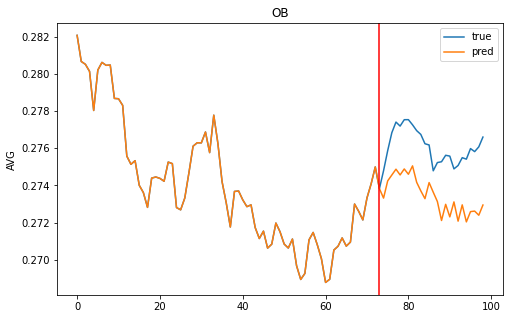

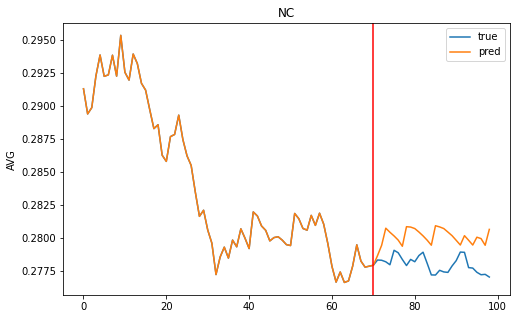

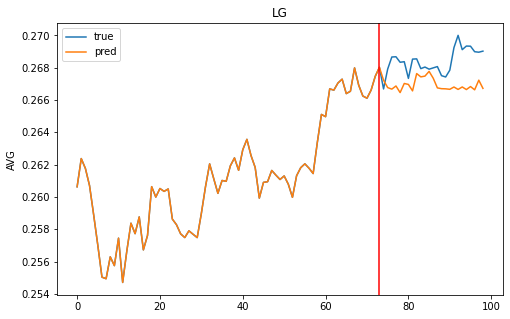

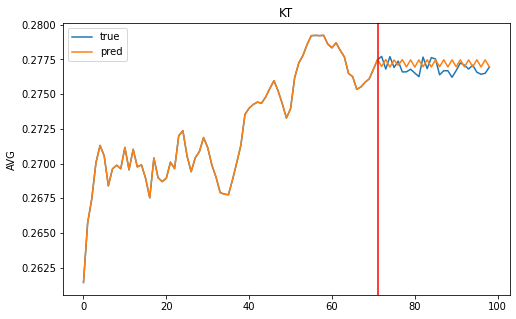

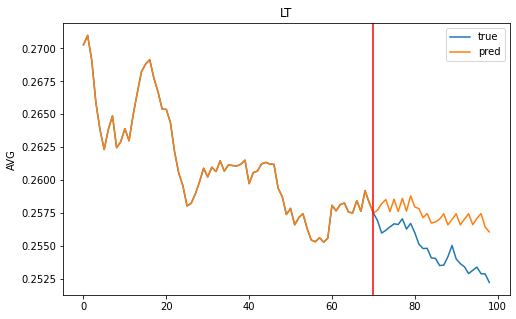

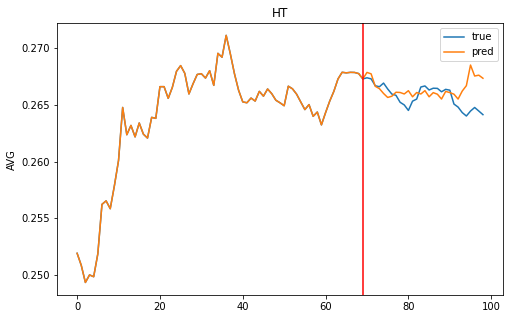

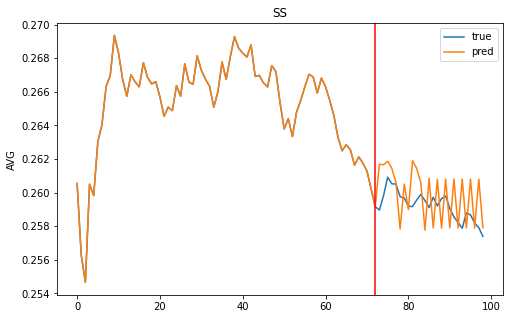

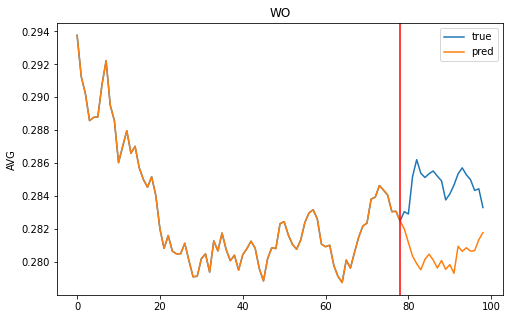

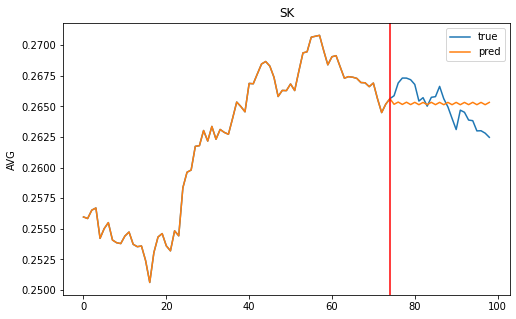

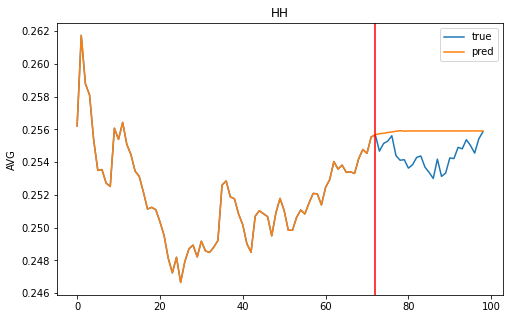

In [11]:
for i in AVG_TOTAL.index:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(vars()['AVG_pred_'+i]['AVG'], label='true')
    ax.plot(vars()['AVG_pred_'+i]['AVG(pred)'], label='pred')
    ax.axvline(num_play[i][0]-41, color='red')
    ax.legend()
    ax.set_title(i)
    ax.set_ylabel('AVG')
    plt.show()

# ERA

In [12]:
def ERA(t,team, start, end):
    t = t.sort_values(['T_ID', 'GDAY_DS']).reset_index(drop=True)
    XX = t[t['T_ID']==team].reset_index(drop=True)
    X_train = XX.iloc[40:start, [XX.columns.get_loc('ERA_1')]].reset_index(drop=True)
    y_train = XX.iloc[40:start, XX.columns.get_loc('ERA')].reset_index(drop=True)
    X_test = pd.DataFrame([y_train.iloc[start-41]], columns=['ERA_1'])
    for i in range(start-40, end-40):
        rf = RandomForestRegressor(random_state=123)
        rf.fit(X_train, y_train)
        X_train = pd.concat([X_train, pd.DataFrame([y_train.iloc[i-1]], columns=['ERA_1'])]).reset_index(drop=True)
        y_train = pd.concat([y_train, pd.Series(rf.predict(X_test))]).reset_index(drop=True)
        X_test = pd.DataFrame([y_train.iloc[i]], columns=['ERA_1'])
    ERA_pred = pd.concat([y_train, pd.DataFrame(rf.predict(X_test))]).reset_index(drop=True)
    ERA_pred.columns = ['ERA(pred)']
    ERA_pred = pd.concat([XX.iloc[40:end+1, XX.columns.get_loc('ERA')].reset_index(drop=True), ERA_pred], axis=1)
    return ERA_pred

In [13]:
var_names = 'ERA_pred_' + t19['T_ID'].unique()
for var_name in var_names:
    team_name = var_name[9:11]
    globals()[var_name] = ERA(t19, team_name, num_play[team_name][0], num_play[team_name][1])

In [14]:
ERA_TOTAL = pd.concat([pd.DataFrame([ERA_pred_OB.iloc[num_play['OB'][0]-41, 1], ERA_pred_NC.iloc[num_play['NC'][0]-41, 1], ERA_pred_LG.iloc[num_play['LG'][0]-41, 1], ERA_pred_KT.iloc[num_play['KT'][0]-41, 1],
                                    ERA_pred_LT.iloc[num_play['LT'][0]-41, 1], ERA_pred_HT.iloc[num_play['HT'][0]-41, 1], ERA_pred_SS.iloc[num_play['SS'][0]-41, 1], ERA_pred_WO.iloc[num_play['WO'][0]-41, 1],
                                    ERA_pred_SK.iloc[num_play['SK'][0]-41, 1], ERA_pred_HH.iloc[num_play['HH'][0]-41, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA_pred(start)']),
                       pd.DataFrame([ERA_pred_OB.iloc[-1, 1], ERA_pred_NC.iloc[-1, 1], ERA_pred_LG.iloc[-1, 1], ERA_pred_KT.iloc[-1, 1],
                                    ERA_pred_LT.iloc[-1, 1], ERA_pred_HT.iloc[-1, 1], ERA_pred_SS.iloc[-1, 1], ERA_pred_WO.iloc[-1, 1],
                                    ERA_pred_SK.iloc[-1, 1], ERA_pred_HH.iloc[-1, 1]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA_pred(end)']),
                       pd.DataFrame([ERA_pred_OB.iloc[-1, 0], ERA_pred_NC.iloc[-1, 0], ERA_pred_LG.iloc[-1, 0], ERA_pred_KT.iloc[-1, 0],
                                     ERA_pred_LT.iloc[-1, 0], ERA_pred_HT.iloc[-1, 0], ERA_pred_SS.iloc[-1, 0], ERA_pred_WO.iloc[-1, 0],
                                     ERA_pred_SK.iloc[-1, 0], ERA_pred_HH.iloc[-1, 0]],
             ['OB', 'NC', 'LG', 'KT', 'LT', 'HT', 'SS', 'WO', 'SK', 'HH'], ['ERA(end)'])], axis=1)
ERA_TOTAL

,ERA_pred(start),ERA_pred(end),ERA(end)
OB,3.551240,3.578129,3.530214
NC,4.140000,4.208026,4.017600
LG,3.988636,3.994115,3.878772
KT,4.504505,4.536530,4.365834
LT,5.129909,5.157953,4.907767
HT,4.771750,4.929950,4.752644
SS,4.653947,4.546734,4.604088
WO,3.923293,3.924769,3.653537
SK,3.390057,3.369906,3.518312
HH,5.033289,5.036833,4.849337


In [15]:
np.sqrt(mse(ERA_TOTAL['ERA_pred(end)'], ERA_TOTAL['ERA(end)']))

0.17580254004416637

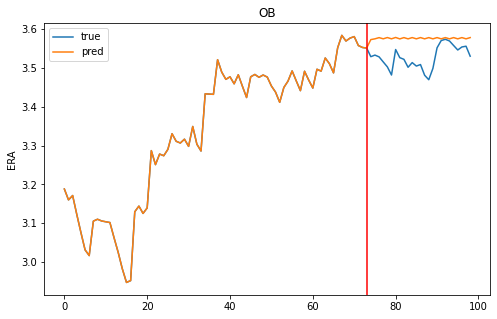

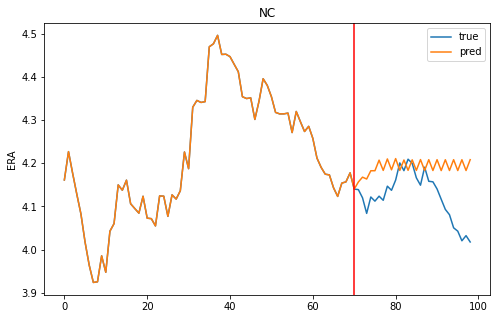

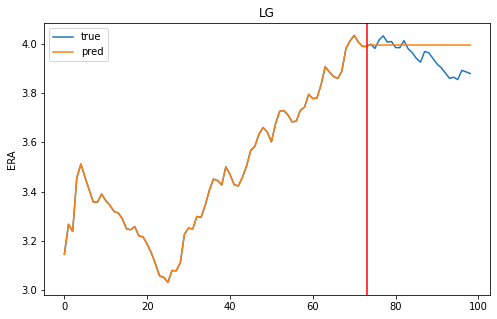

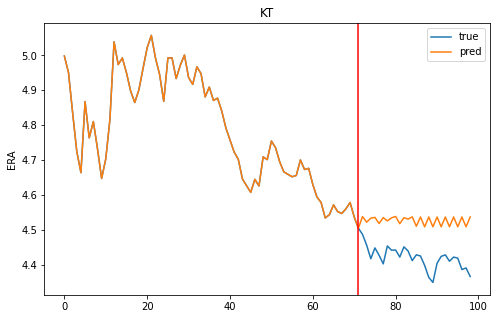

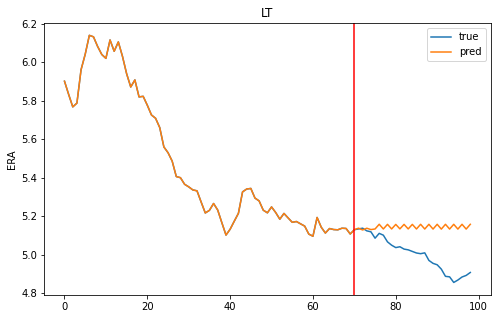

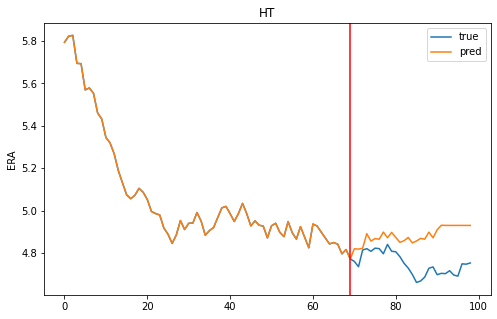

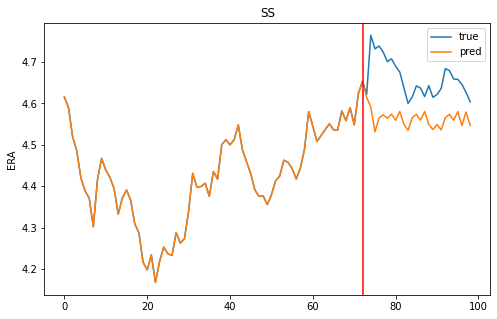

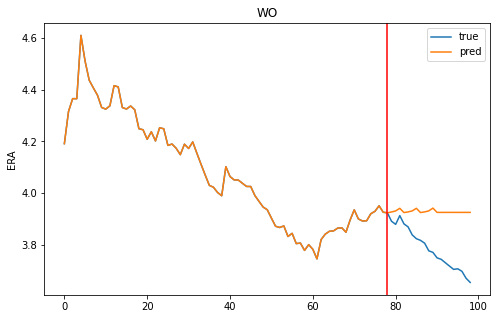

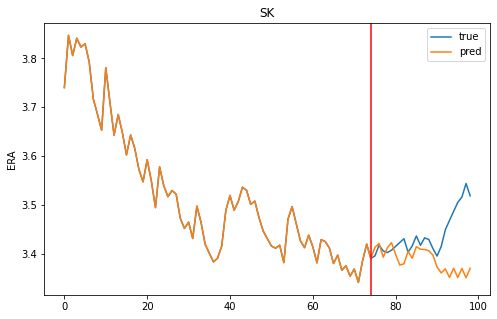

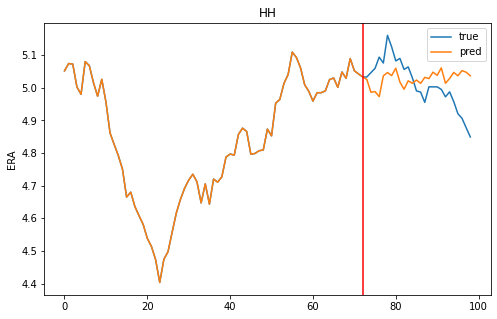

In [16]:
for i in ERA_TOTAL.index:
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(vars()['ERA_pred_'+i]['ERA'], label='true')
    ax.plot(vars()['ERA_pred_'+i]['ERA(pred)'], label='pred')
    ax.axvline(num_play[i][0]-41, color='red')
    ax.legend()
    ax.set_title(i)
    ax.set_ylabel('ERA')
    plt.show()